# **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import pearsonr



# **Loading Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Loading Data after mounting GDrive
data = pd.read_csv('/content/drive/MyDrive/ATom/Project2/Food data.csv')

display(data.head())
display(data.tail())


ID        date  meals_served kitchen_staff  temperature_C  \
0   0  12/19/2022         196.0            13      27.887273   
1   1  11/21/2023         244.0            15      10.317872   
2   2    2/1/2022         148.0            16      27.714300   
3   3   3/19/2023         157.0            19      19.173902   
4   4   7/18/2022         297.0            10      26.375233   

   humidity_percent  day_of_week special_event  past_waste_kg  \
0         45.362854            0             0       7.740587   
1         64.430475            1             0      42.311779   
2         69.046113            1             0      41.184305   
3         46.292823            6             0      41.543492   
4         79.741064            0             0      26.525097   

  staff_experience waste_category  
0     intermediate          dairy  
1              NaN           MeAt  
2         Beginner           MeAt  
3         Beginner           MeAt  
4     Intermediate           MEAT

ID        date  meals_served kitchen_staff  temperature_C  \
1817  1817   3/29/2022         395.0            18      17.354199   
1818  1818  11/27/2022         483.0            11      24.912137   
1819  1819   4/12/2023         243.0            11      28.870946   
1820  1820   2/14/2022         406.0            10      19.061638   
1821  1821   5/10/2024         350.0             6      23.708015   

      humidity_percent  day_of_week special_event  past_waste_kg  \
1817         45.138435            1             0      40.550668   
1818         59.485091            6             0      36.470276   
1819         70.508404            2             0      19.767203   
1820         55.286642            0             0      28.560361   
1821         51.351286            4             0      46.786860   

     staff_experience waste_category  
1817     Intermediate         GRAINS  
1818     intermediate          dairy  
1819     Intermediate           MeAt  
1820           EXPERT           MEAT  
1821     intermediate     Vegetables

# **1. Data Cleaning**



In [9]:
# Quick dataset overview
print("Data info\n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB
Data info
 None


In [10]:
#Descriptive stats (missing values will show as NaN)
print("\nData Description\n",data.describe())


Data Description
                 ID  meals_served  temperature_C  humidity_percent  \
count  1822.000000   1790.000000    1822.000000       1806.000000   
mean    910.500000    373.512849      22.189280         60.791257   
std     526.110413    494.791973       8.919939         17.326232   
min       0.000000    100.000000     -10.372207         30.121111   
25%     455.250000    211.250000      15.684259         46.035158   
50%     910.500000    306.000000      22.115040         61.634935   
75%    1365.750000    407.000000      28.807494         75.789317   
max    1821.000000   4730.000000      60.000000         89.982828   

       day_of_week  past_waste_kg  
count   1822.00000    1806.000000  
mean       3.01427      26.997534  
std        2.00899      12.791891  
min        0.00000       5.008394  
25%        1.00000      15.990760  
50%        3.00000      26.832569  
75%        5.00000      38.116308  
max        6.00000      49.803703  


In [11]:
# Data Shape
print("Data Shape:", data.shape)

# Data Types
print("\nData Types:")
print(data.dtypes)

Data Shape: (1822, 11)

Data Types:
ID                    int64
date                 object
meals_served        float64
kitchen_staff        object
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event        object
past_waste_kg       float64
staff_experience     object
waste_category       object
dtype: object


Check for Missing Value

In [12]:

# Check how many missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Values:")
print(missing_values)
print("\nPercentage of Missing Values:")
print(missing_percentage)



Missing Values:
ID                    0
date                  0
meals_served         32
kitchen_staff        18
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    337
waste_category       21
dtype: int64

Percentage of Missing Values:
ID                   0.000000
date                 0.000000
meals_served         1.756312
kitchen_staff        0.987925
temperature_C        0.000000
humidity_percent     0.878156
day_of_week          0.000000
special_event        0.000000
past_waste_kg        0.878156
staff_experience    18.496158
waste_category       1.152580
dtype: float64


In [13]:
#checking columns which have more than 50% missing values
missing_percentage[missing_percentage > 50]

Series([], dtype: float64)

**1.2. Check for Duplicate Rows**


In [14]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [ID, date, meals_served, kitchen_staff, temperature_C, humidity_percent, day_of_week, special_event, past_waste_kg, staff_experience, waste_category]
Index: []


**1.3. Handle Categorical Data**

For categorical columns, we will check for missing values and decide on how to handle them, such as by using the most frequent category or removing rows with missing values.


In [15]:
obj_col=data.select_dtypes(include=['object'])
obj_col.columns

Index(['date', 'kitchen_staff', 'special_event', 'staff_experience',
       'waste_category'],
      dtype='object')

In [16]:
data["staff_experience"].value_counts()

staff_experience
Beginner        381
Intermediate    368
intermediate    366
EXPERT          346
Pro              24
Name: count, dtype: int64

In [17]:
#lets first convert Intermediate to intermediate, basically merge both values, as they are sam
data['staff_experience'] = data['staff_experience'].replace('intermediate', 'Intermediate')

print(data["staff_experience"].unique())
data["staff_experience"].value_counts()

['Intermediate' nan 'Beginner' 'EXPERT' 'Pro']


staff_experience
Intermediate    734
Beginner        381
EXPERT          346
Pro              24
Name: count, dtype: int64

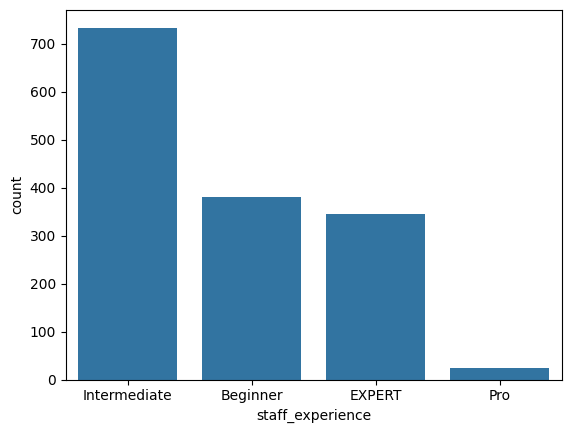

In [18]:
sns.countplot(x='staff_experience', data=data)
plt.show()

In [19]:
print(data.shape)               # How many rows are left?
print(data.isnull().sum())      # Are all NaNs gone?

(1822, 11)
ID                    0
date                  0
meals_served         32
kitchen_staff        18
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    337
waste_category       21
dtype: int64


In [20]:
data.dropna(subset=['staff_experience'], inplace=True)
print(data.shape)
print(data.isnull().sum())      # Are all NaNs gone?
print(data["staff_experience"].unique())


(1485, 11)
ID                   0
date                 0
meals_served        28
kitchen_staff       18
temperature_C        0
humidity_percent     7
day_of_week          0
special_event        0
past_waste_kg       16
staff_experience     0
waste_category      13
dtype: int64
['Intermediate' 'Beginner' 'EXPERT' 'Pro']


In [21]:
print(data["waste_category"].value_counts())
print(data["waste_category"].isnull().sum())

waste_category
MEAT          347
dairy         291
Vegetables    278
MeAt          277
GRAINS        258
Wheat          12
Barley          9
Name: count, dtype: int64
13


In [22]:
   #merging ,  MeAt and MEAT , GRAINS , Wheat , Barley in waste category column
data['waste_category'] = data['waste_category'].replace('MeAt','MEAT')
data["waste_category"].value_counts()
# Now Grains
data['waste_category'] = data['waste_category'].replace('Wheat','GRAINS').replace('Barley','GRAINS')
print(data["waste_category"].unique())
print(data["waste_category"].value_counts())
print(data["waste_category"].isnull().sum())

['dairy' 'MEAT' 'Vegetables' 'GRAINS' nan]
waste_category
MEAT          624
dairy         291
GRAINS        279
Vegetables    278
Name: count, dtype: int64
13


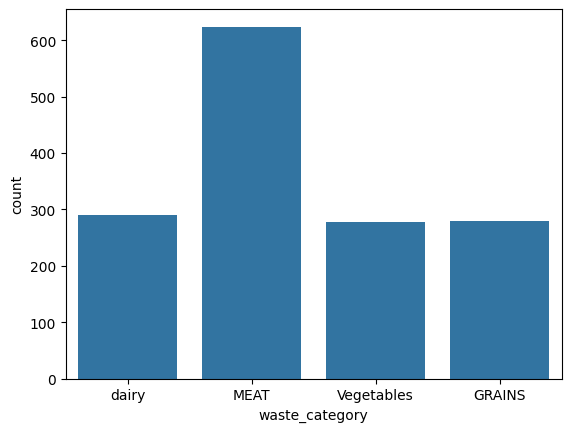

In [23]:
count_plot = sns.countplot(x='waste_category', data=data)
plt.show()

In [24]:
#dropping the missing values'
data.dropna(subset=['waste_category'], inplace=True)
print(data.shape)
print(data.isnull().sum())      # Are all NaNs gone?
print(data["waste_category"].unique())

(1472, 11)
ID                   0
date                 0
meals_served        28
kitchen_staff       18
temperature_C        0
humidity_percent     7
day_of_week          0
special_event        0
past_waste_kg       16
staff_experience     0
waste_category       0
dtype: int64
['dairy' 'MEAT' 'Vegetables' 'GRAINS']


In [25]:
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows: ",duplicate_rows)

Duplicate Rows:  Empty DataFrame
Columns: [ID, date, meals_served, kitchen_staff, temperature_C, humidity_percent, day_of_week, special_event, past_waste_kg, staff_experience, waste_category]
Index: []


In [26]:
#unique values (e.g. less than 10 unique values)
low_unique_columns = [col for col in data.columns if data[col].nunique() < 10]
print("Columns with few unique values (possibly categorical):", low_unique_columns)



Columns with few unique values (possibly categorical): ['day_of_week', 'special_event', 'staff_experience', 'waste_category']


In [27]:
#using Label Encoding technique
#le = LabelEncoder()
#data['staff_experience'] = le.fit_transform(data['staff_experience'])
#data


**1.4. Correct Data Types**

Ensure the date column is in the correct date format. This will help with time-based analysis (e.g., seasonal patterns).

In [28]:
numerical_cols = data.select_dtypes(include=['number'])
numerical_cols.columns

Index(['ID', 'meals_served', 'temperature_C', 'humidity_percent',
       'day_of_week', 'past_waste_kg'],
      dtype='object')

In [29]:
# Value Distributions for Numerical Columns
numerical_cols = data.select_dtypes(include=['number'])
print("\nSummary Statistics for Numerical Columns:")
numerical_cols.describe()


Summary Statistics for Numerical Columns:


ID  meals_served  temperature_C  humidity_percent  \
count  1472.000000   1444.000000    1472.000000       1465.000000   
mean    911.654891    389.714681      22.241021         60.526126   
std     525.309683    543.903693       9.142489         17.342933   
min       0.000000    100.000000     -10.372207         30.121111   
25%     456.750000    214.750000      15.710737         45.970081   
50%     912.000000    311.000000      22.079213         61.055778   
75%    1364.250000    407.000000      28.879863         75.714409   
max    1821.000000   4730.000000      60.000000         89.982828   

       day_of_week  past_waste_kg  
count  1472.000000    1456.000000  
mean      2.970109      27.016112  
std       2.022760      12.929223  
min       0.000000       5.041824  
25%       1.000000      15.948995  
50%       3.000000      26.854109  
75%       5.000000      38.254026  
max       6.000000      49.796337

In [30]:
data["kitchen_staff"].value_counts()

kitchen_staff
9         115
12        113
5         111
10        102
14        101
19         98
18         96
7          94
15         94
13         93
6          91
16         89
11         89
17         86
8          79
ten         2
eleven      1
Name: count, dtype: int64

In [31]:
#converting the ten word to 10, and eleven to 11 , in column kitchen_staff
# Dictionary for replacements
print(data["kitchen_staff"].dtypes)
replacements = {
    'ten': '10',
    'eleven': '11'
}
# Function to clean and replace
def clean_and_replace(val):
    val_str = str(val).replace(" ", "").lower()
    return replacements.get(val_str, val)

# Apply function and convert to int
data['kitchen_staff']  = data['kitchen_staff'].apply(clean_and_replace)


print(data["kitchen_staff"].value_counts())
print(data["kitchen_staff"].unique())


object
kitchen_staff
9     115
12    113
5     111
10    104
14    101
19     98
18     96
15     94
7      94
13     93
6      91
11     90
16     89
17     86
8      79
Name: count, dtype: int64
['13' '16' '19' '10' '18' '7' '15' '5' '12' '8' '17' '11' '9' nan '6' '14']


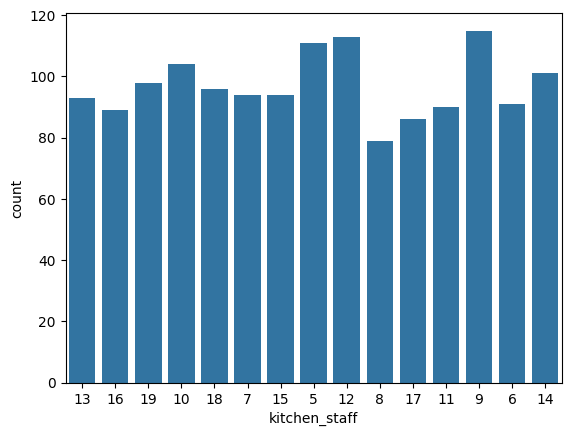

In [32]:
#visualize histogram of data["kitechenstaff"]
sns.countplot(x='kitchen_staff', data=data)
plt.show()


<Axes: >

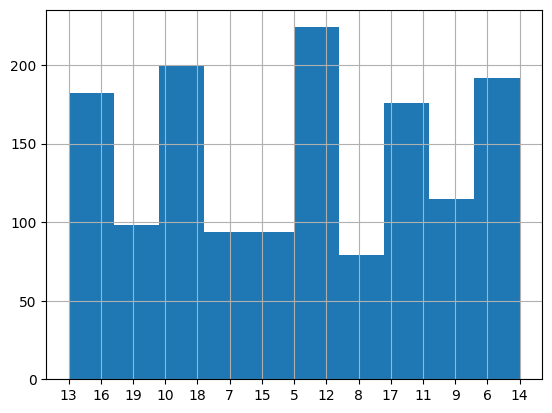

In [33]:
data["kitchen_staff"].hist()

In [34]:
print(data["kitchen_staff"].isna().sum())
data["kitchen_staff"]= data["kitchen_staff"].fillna(data["kitchen_staff"].mode()[0])
print(data["kitchen_staff"].isna().sum())

data["kitchen_staff"] =data["kitchen_staff"].astype(int)
data["kitchen_staff"].dtypes

18
0


dtype('int64')

In [35]:
print(data["meals_served"].isna().sum())

28


<Axes: xlabel='meals_served', ylabel='Count'>

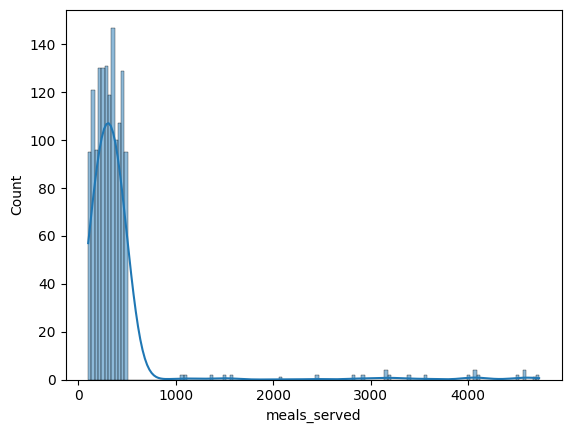

In [36]:
sns.histplot(data['meals_served'], kde=True)

In [37]:
data['meals_served'] = data['meals_served'].fillna(data['meals_served'].median())
print(data["meals_served"].isna().sum())


0


7
float64


<Axes: xlabel='humidity_percent', ylabel='Count'>

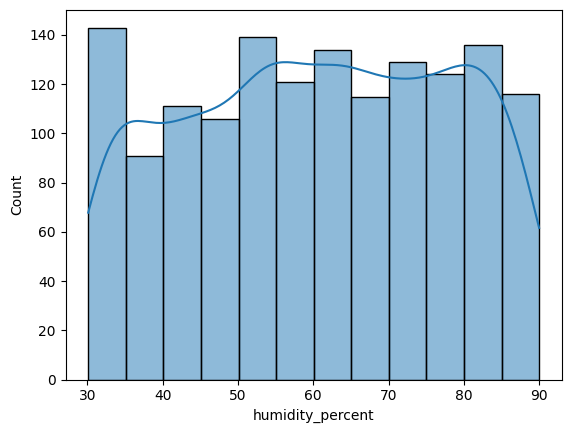

In [38]:
print(data["humidity_percent"].isna().sum())
print(data["humidity_percent"].dtype)
sns.histplot(data['humidity_percent'], kde=True)

In [39]:
data['humidity_percent'] = data['humidity_percent'].fillna(data['humidity_percent'].median())
print(data["humidity_percent"].isna().sum())


0


In [40]:
print(data["past_waste_kg"].isna().sum())

16


count    1456.000000
mean       27.016112
std        12.929223
min         5.041824
25%        15.948995
50%        26.854109
75%        38.254026
max        49.796337
Name: past_waste_kg, dtype: float64


<Axes: xlabel='past_waste_kg', ylabel='Count'>

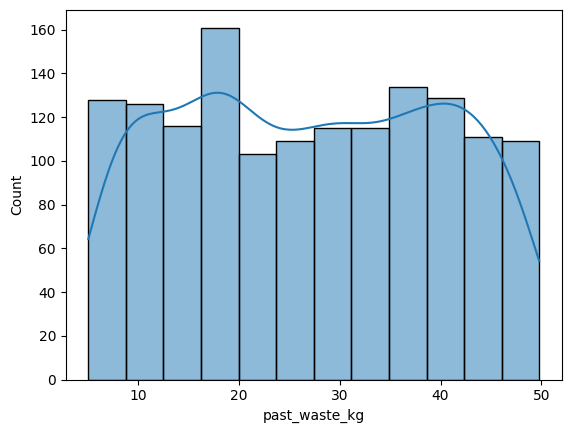

In [41]:
print(data['past_waste_kg'].describe())

sns.histplot(data['past_waste_kg'], kde=True)

In [42]:
data.dropna(subset=['past_waste_kg'], inplace=True)
print(data["past_waste_kg"].isna().sum())

0


In [43]:
# Find NaN (missing) values in 'date' column
nan_dates = data[data['date'].isna()]

print(nan_dates)

Empty DataFrame
Columns: [ID, date, meals_served, kitchen_staff, temperature_C, humidity_percent, day_of_week, special_event, past_waste_kg, staff_experience, waste_category]
Index: []


Visualizing

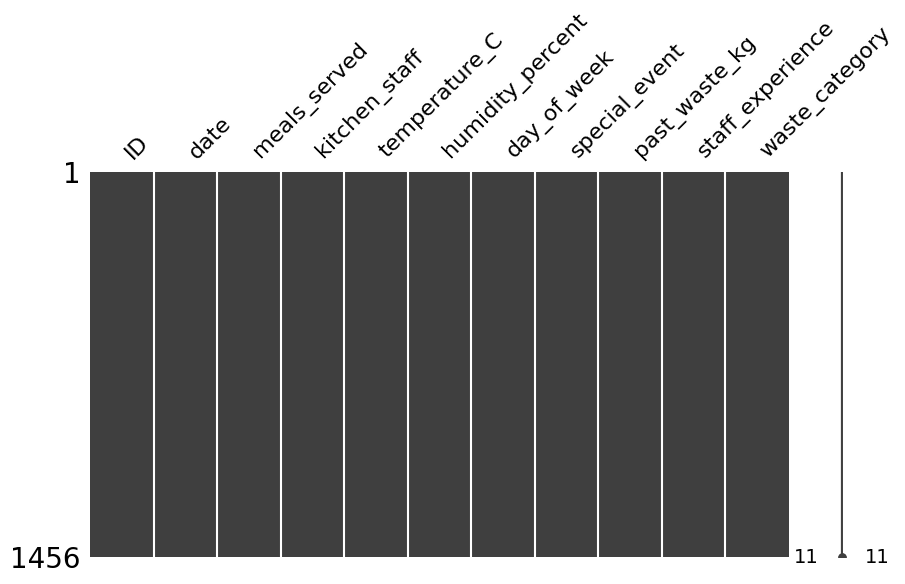

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


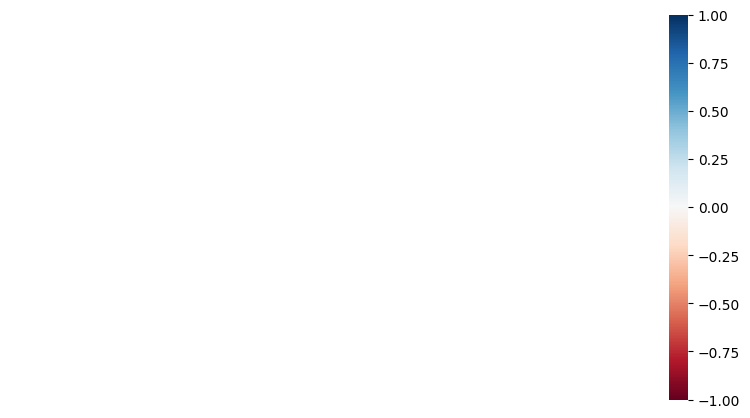

In [44]:
# Matrix plot
msno.matrix(data)
plt.gcf().set_size_inches(10, 5)
plt.show()
# Heatmap
msno.heatmap(data)
plt.gcf().set_size_inches(10, 5)
plt.show()

In [45]:
#Special event
data['special_event'].unique()

array(['0', '1', 'One '], dtype=object)

In [46]:
data['special_event'] = data['special_event'].apply(lambda x: 1 if str(x).strip().lower() == 'one' else x)

data['special_event'].unique()

array(['0', '1', 1], dtype=object)

In [47]:
data['special_event'] = data['special_event'].astype(int)
data['special_event'].value_counts()

special_event
0    1333
1     123
Name: count, dtype: int64

In [48]:
data.tail()

ID        date  meals_served  kitchen_staff  temperature_C  \
1817  1817   3/29/2022         395.0             18      17.354199   
1818  1818  11/27/2022         483.0             11      24.912137   
1819  1819   4/12/2023         243.0             11      28.870946   
1820  1820   2/14/2022         406.0             10      19.061638   
1821  1821   5/10/2024         350.0              6      23.708015   

      humidity_percent  day_of_week  special_event  past_waste_kg  \
1817         45.138435            1              0      40.550668   
1818         59.485091            6              0      36.470276   
1819         70.508404            2              0      19.767203   
1820         55.286642            0              0      28.560361   
1821         51.351286            4              0      46.786860   

     staff_experience waste_category  
1817     Intermediate         GRAINS  
1818     Intermediate          dairy  
1819     Intermediate           MEAT  
1820           EXPERT           MEAT  
1821     Intermediate     Vegetables

In [49]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # handles invalid formats safely
print(data['date'].dtype)
#data['date'] = pd.to_datetime(data['date'], errors='coerce')


datetime64[ns]


# **2. Exploratory Data Analysis (EDA)**



## **2.1. Summary Statistics**

Start by computing the summary statistics for the numerical columns:
● Mean, median, standard deviation, minimum, and maximum values.
● This will help identify the central tendency and spread of the data.

In [50]:
data.describe()

ID                           date  meals_served  \
count  1456.000000                           1456   1456.000000   
mean    911.958791  2023-04-25 19:50:46.153846272    388.774038   
min       0.000000            2022-01-01 00:00:00    100.000000   
25%     456.750000            2022-07-22 18:00:00    216.750000   
50%     915.500000            2023-05-02 00:00:00    311.000000   
75%    1364.250000            2024-01-16 12:00:00    405.000000   
max    1821.000000            2024-09-26 00:00:00   4730.000000   
std     525.263212                            NaN    541.576362   

       kitchen_staff  temperature_C  humidity_percent  day_of_week  \
count    1456.000000    1456.000000       1456.000000  1456.000000   
mean       11.901786      22.241845         60.455572     2.975962   
min         5.000000     -10.372207         30.121111     0.000000   
25%         8.000000      15.693355         45.970081     1.000000   
50%        12.000000      22.094587         61.055778     3.000000   
75%        16.000000      28.906616         75.241382     5.000000   
max        19.000000      60.000000         89.982828     6.000000   
std         4.308463       9.165394         17.288620     2.024957   

       special_event  past_waste_kg  
count    1456.000000    1456.000000  
mean        0.084478      27.016112  
min         0.000000       5.041824  
25%         0.000000      15.948995  
50%         0.000000      26.854109  
75%         0.000000      38.254026  
max         1.000000      49.796337  
std         0.278199      12.929223

## **2.2. Visualizing Distributions**

We'll use several types of visualizations to explore the data:

● Histograms: To understand the distribution of numerical features like
meals_served, temperature_C, humidity_percent, and past_waste_kg.
● Boxplots: To detect outliers and understand the spread of the data.

● Bar plots: To visualize categorical variables like staff_experience and waste_category.

        ID  meals_served  kitchen_staff  temperature_C  humidity_percent  \
0        0         196.0             13      27.887273         45.362854   
2        2         148.0             16      27.714300         69.046113   
3        3         157.0             19      19.173902         46.292823   
4        4         297.0             10      26.375233         79.741064   
5        5         241.0             18      16.863506         79.285920   
...    ...           ...            ...            ...               ...   
1817  1817         395.0             18      17.354199         45.138435   
1818  1818         483.0             11      24.912137         59.485091   
1819  1819         243.0             11      28.870946         70.508404   
1820  1820         406.0             10      19.061638         55.286642   
1821  1821         350.0              6      23.708015         51.351286   

      day_of_week  special_event  past_waste_kg  
0               0              0     

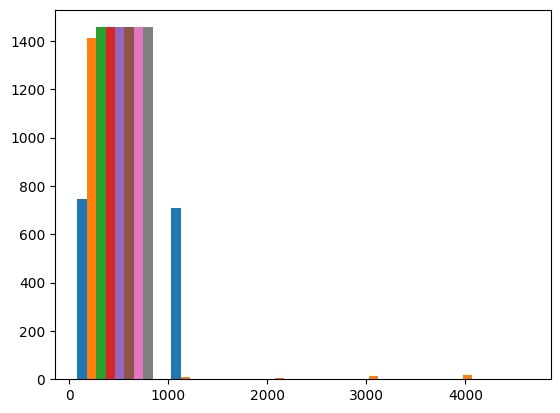

In [51]:
numerical_cols = data.select_dtypes(include=['number'])
print(numerical_cols)
plt.hist(numerical_cols, bins=5)
plt.show()


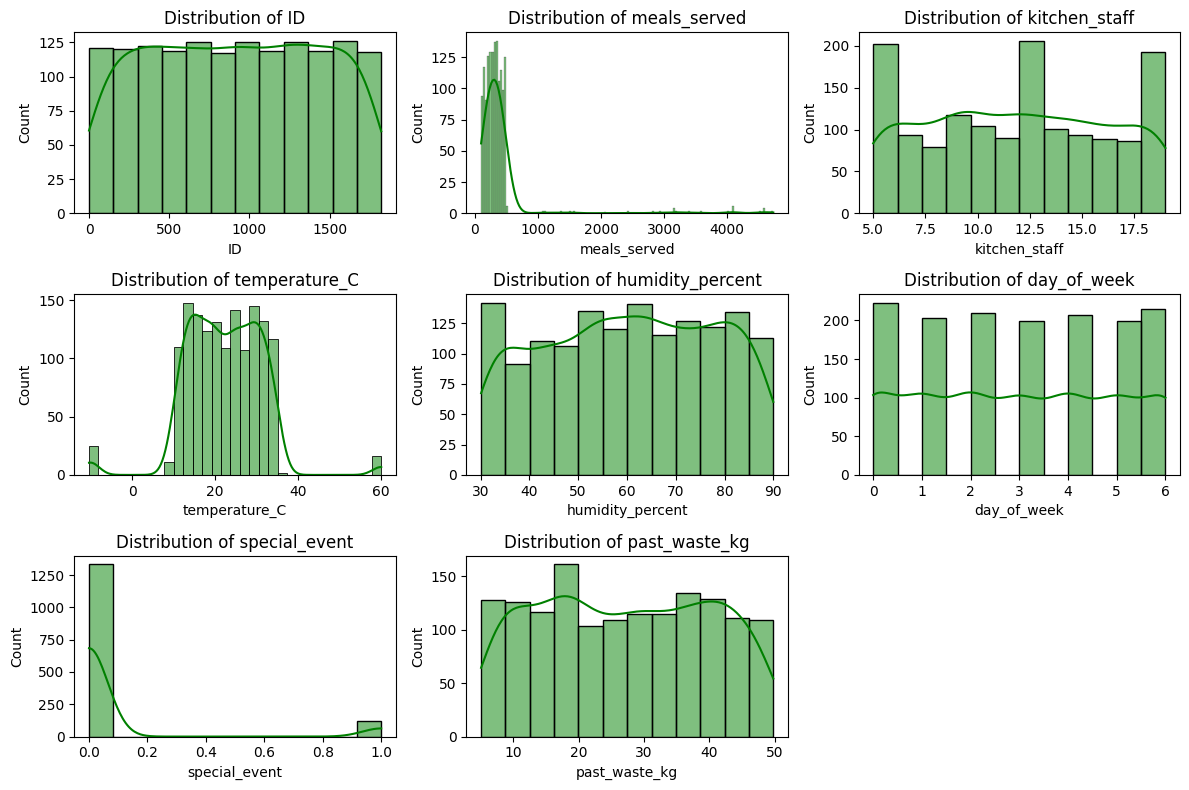

In [52]:
plt.figure(figsize=(12,8))  # Increased figure size
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True, color='Green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

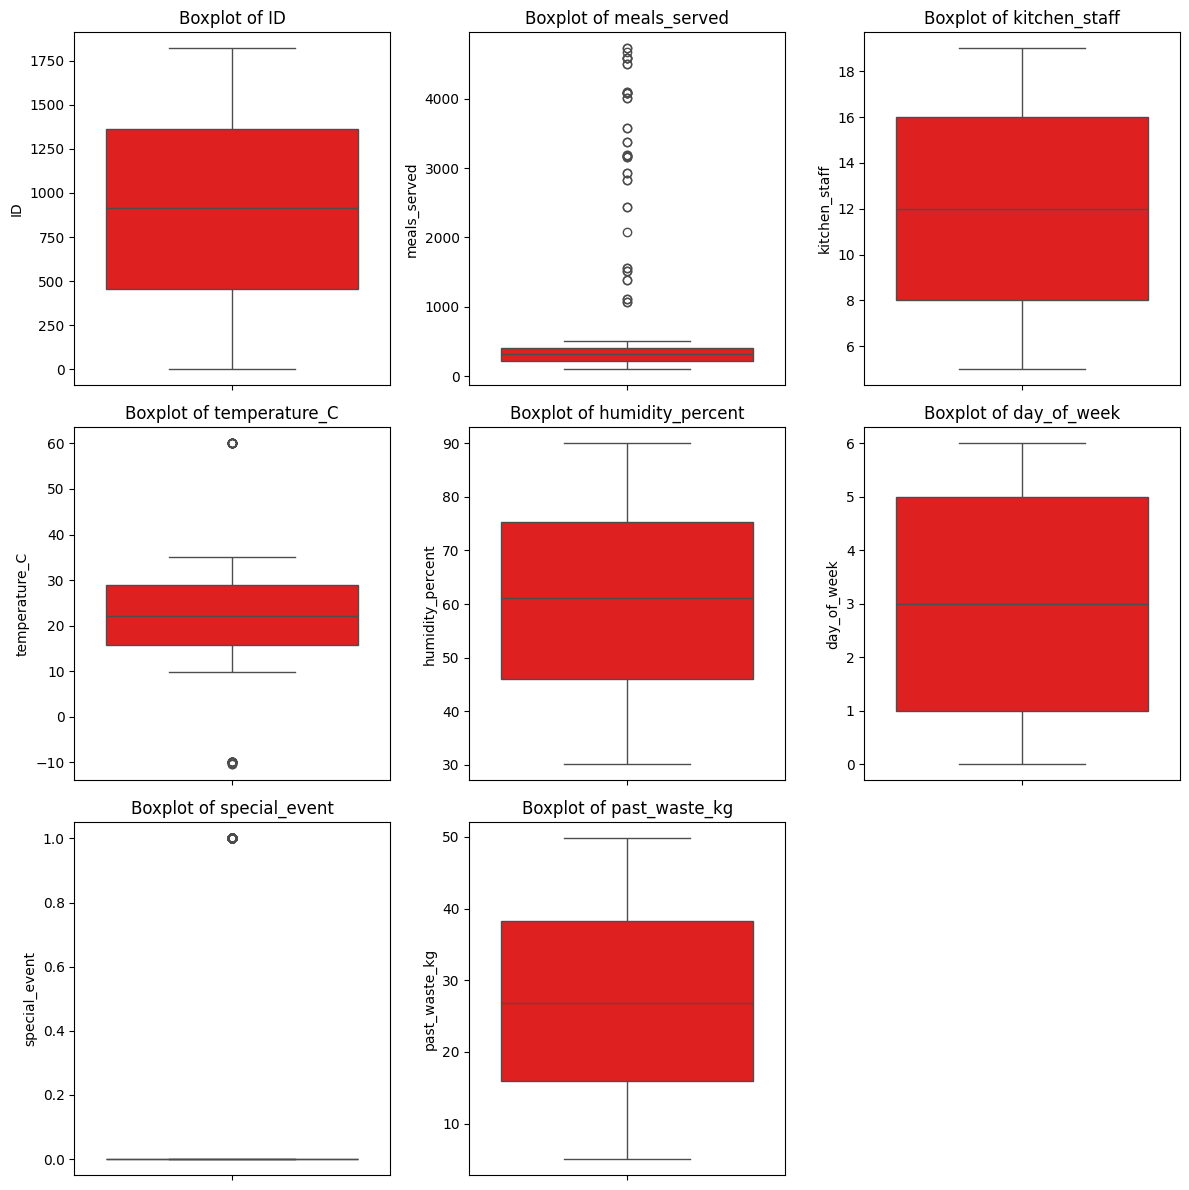

In [53]:
#box Plots
plt.figure(figsize=(12,12))  # Increased figure size
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col], color='red')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

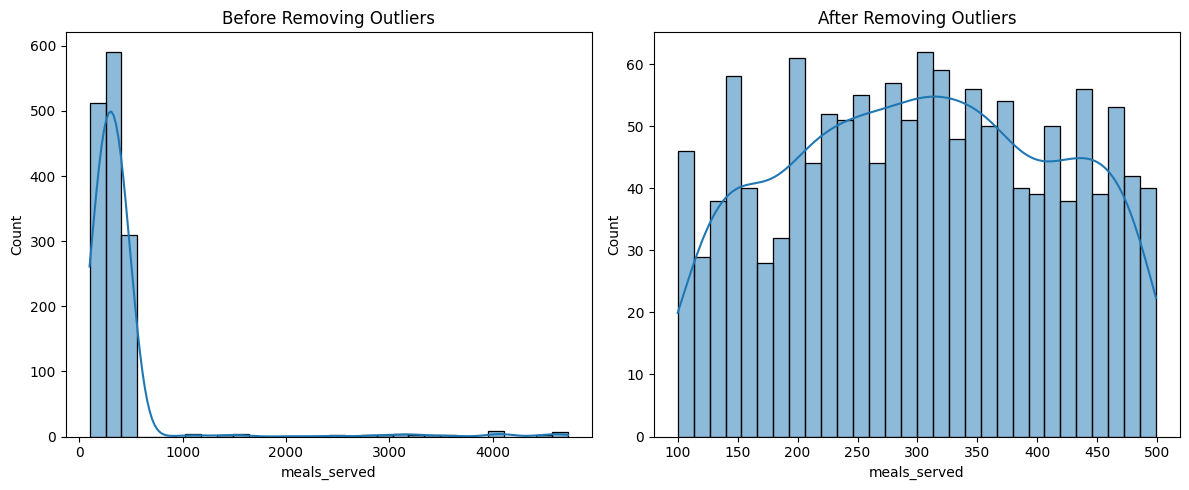

In [54]:
#lets work on meals served



# Step 1: Visualize BEFORE removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['meals_served'], bins=30, kde=True)
plt.title('Before Removing Outliers')
plt.xlabel('meals_served')
plt.ylabel('Count')

# Step 2: Remove outliers using IQR
Q1 = data['meals_served'].quantile(0.25)
Q3 = data['meals_served'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_clean = data[(data['meals_served'] >= lower_bound) & (data['meals_served'] <= upper_bound)]

# Step 3: Visualize AFTER removing outliers
plt.subplot(1, 2, 2)
sns.histplot(data_clean['meals_served'], bins=30, kde=True)
plt.title('After Removing Outliers')
plt.xlabel('meals_served')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


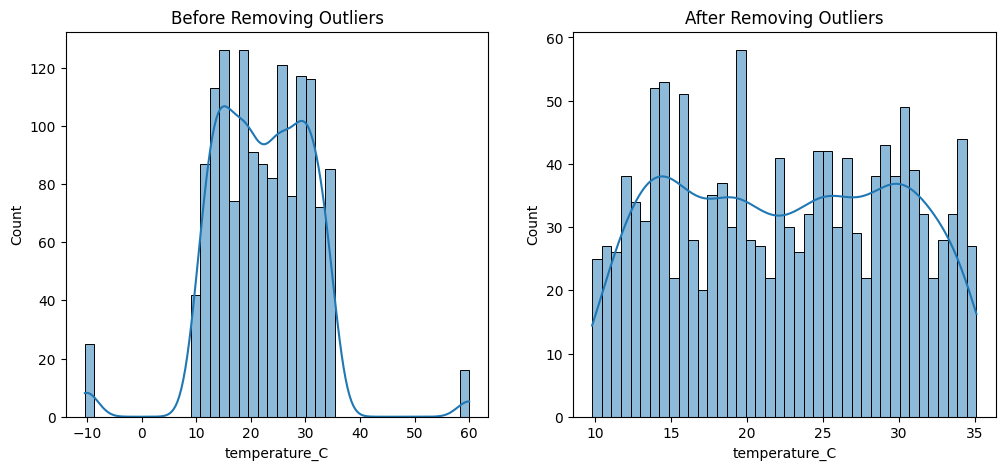

In [55]:
import numpy as np
data_clean = data_clean[(np.abs(stats.zscore(data_clean["temperature_C"])) < 3)]
plt.figure(figsize=(12, 5))

# Before removal
plt.subplot(1, 2, 1)
sns.histplot(data["temperature_C"], bins=40, kde=True)
plt.title("Before Removing Outliers")

# After removal
plt.subplot(1, 2, 2)
sns.histplot(data_clean["temperature_C"], bins=40, kde=True)
plt.title("After Removing Outliers")

plt.show()

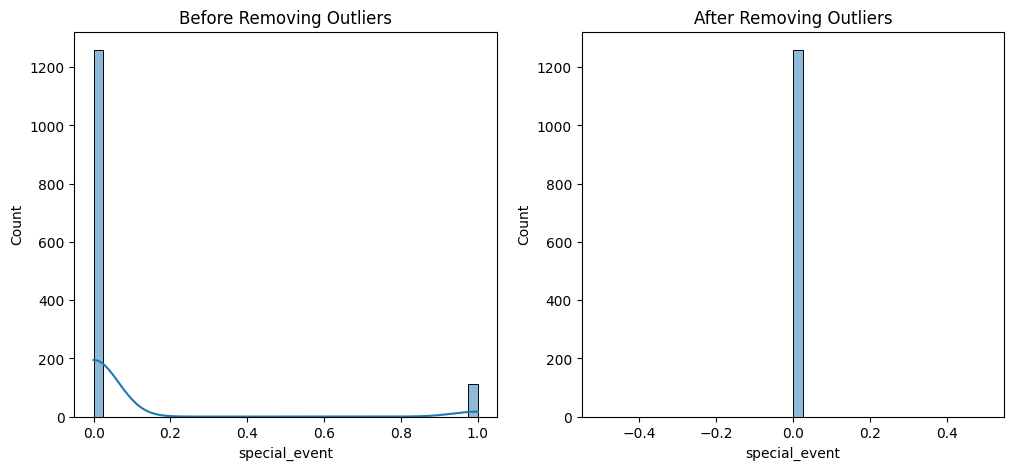

<ipython-input-56-1bdac9702e6b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_as["special_event"]=data["special_event"]


In [56]:
data_as = data_clean[(np.abs(stats.zscore(data_clean['special_event'])) < 3)]
plt.figure(figsize=(12, 5))

# Before removal
plt.subplot(1, 2, 1)
sns.histplot(data_clean['special_event'], bins=40, kde=True)
plt.title("Before Removing Outliers")

# After removal
plt.subplot(1, 2, 2)
sns.histplot(data_as["special_event"], bins=40, kde=True)
plt.title("After Removing Outliers")

plt.show()
#we cant perform outlier removal operation on this field
data_as["special_event"]=data["special_event"]

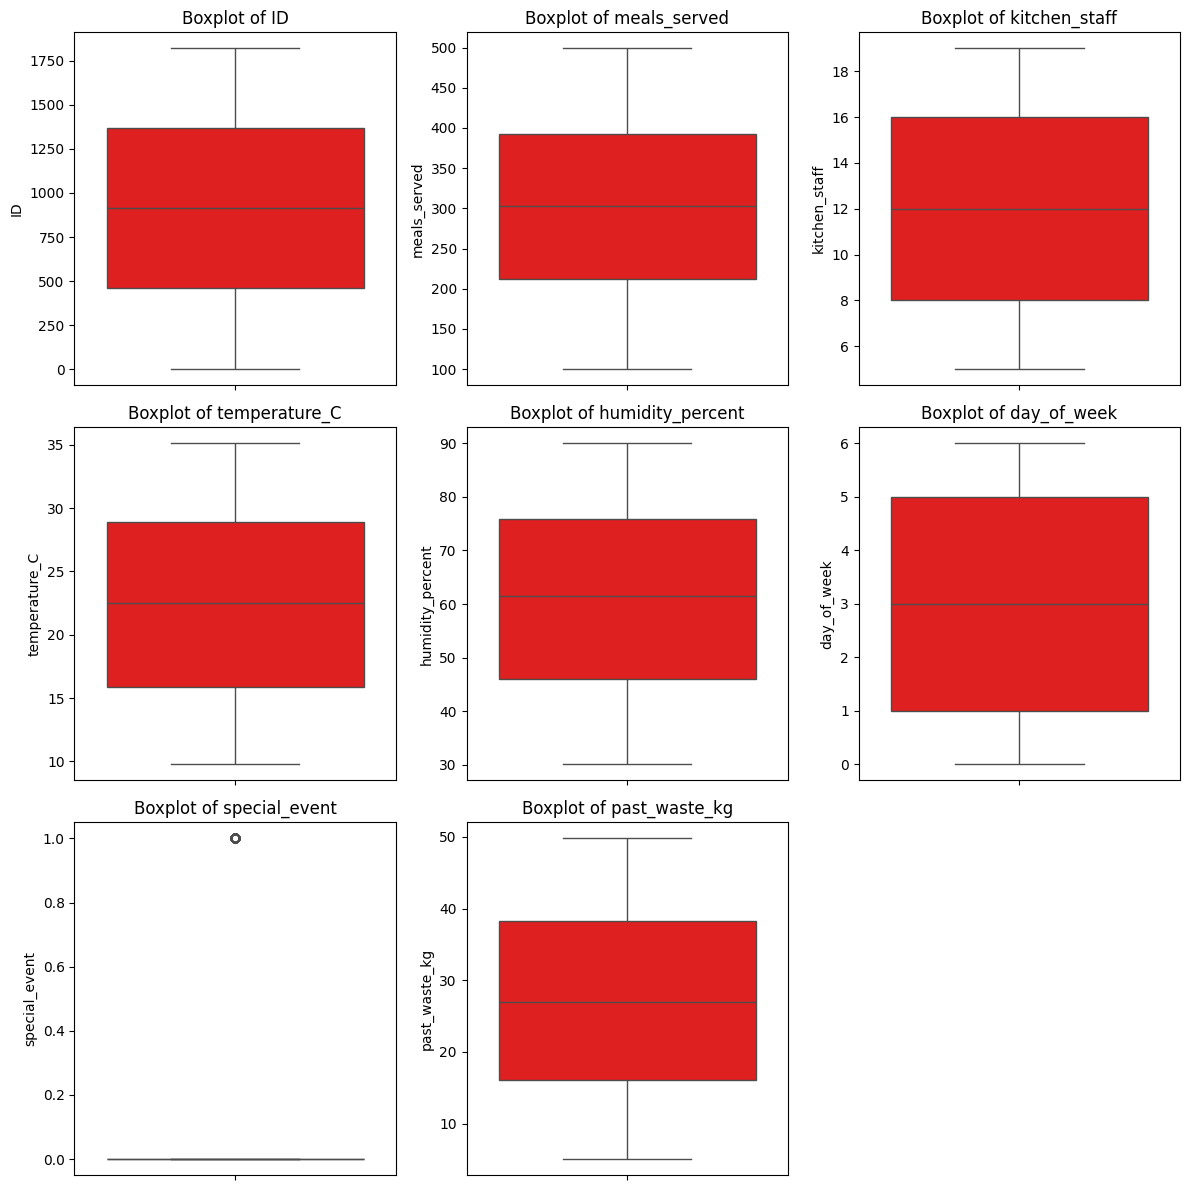

In [58]:
#box Plots
#data_clean.drop(columns=["Z_score"])
numerical= data_clean.select_dtypes(include=['number'])


plt.figure(figsize=(12,12))  # Increased figure size
for i, col in enumerate(numerical):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data_clean[col], color='red')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
data_clean.drop(columns=["Z_score"])

Columns      staff_experience waste_category
0        Intermediate          dairy
2            Beginner           MEAT
3            Beginner           MEAT
4        Intermediate           MEAT
5        Intermediate          dairy
...               ...            ...
1817     Intermediate         GRAINS
1818     Intermediate          dairy
1819     Intermediate           MEAT
1820           EXPERT           MEAT
1821     Intermediate     Vegetables

[1371 rows x 2 columns]


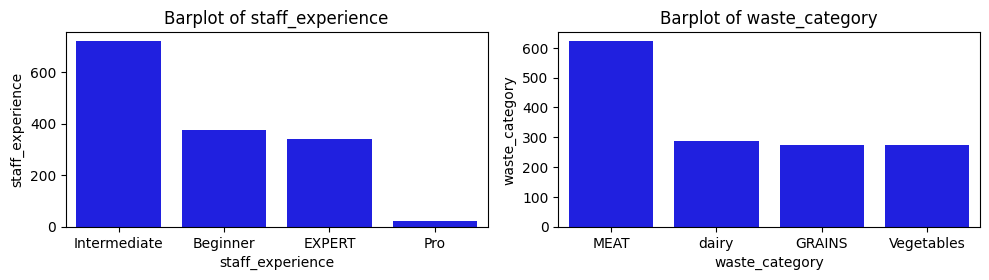

In [59]:
#Bar Plots
obj_col=data_clean.select_dtypes(include=['object'])
print("Columns",obj_col)
plt.figure(figsize=(10,5))  # Increased figure size
for i, col in enumerate(obj_col):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts().values, color='blue')
    plt.title(f'Barplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

        ID  meals_served  kitchen_staff  temperature_C  humidity_percent  \
0        0         196.0             13      27.887273         45.362854   
2        2         148.0             16      27.714300         69.046113   
3        3         157.0             19      19.173902         46.292823   
4        4         297.0             10      26.375233         79.741064   
5        5         241.0             18      16.863506         79.285920   
...    ...           ...            ...            ...               ...   
1817  1817         395.0             18      17.354199         45.138435   
1818  1818         483.0             11      24.912137         59.485091   
1819  1819         243.0             11      28.870946         70.508404   
1820  1820         406.0             10      19.061638         55.286642   
1821  1821         350.0              6      23.708015         51.351286   

      day_of_week  special_event  past_waste_kg  
0               0              0     

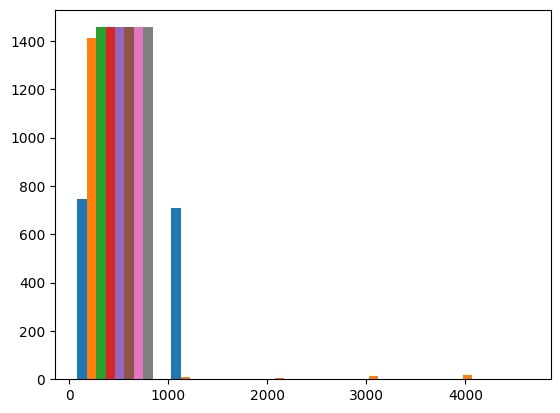

In [60]:
numerical_data_cleaned = data_clean.select_dtypes(include=['number'])
print(numerical_cols)
plt.hist(numerical_cols, bins=5)
plt.show()

## **2.3. Correlation Analysis**

By calculating the correlation matrix between the numerical variables, we can identify
potential relationships between features. For example:

● Is there a correlation between the number of meals served and the amount of
food waste?

● Does temperature or humidity influence food waste?

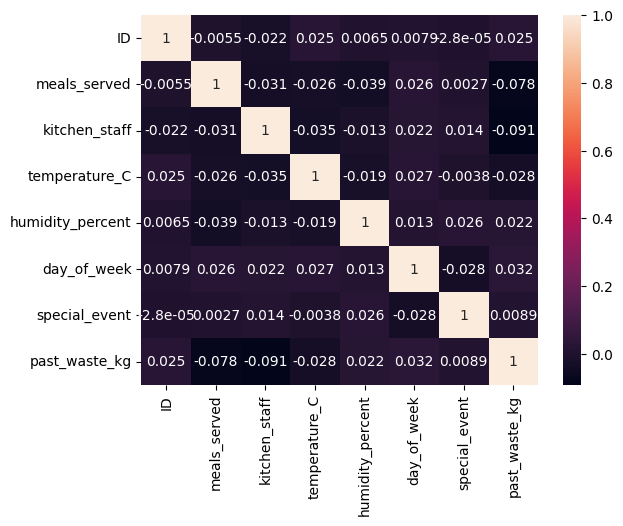

In [61]:

numerical_data_cleaned.corr()
sns.heatmap(numerical_cols.corr(), annot=True)
plt.show()

<ipython-input-62-f368740da257>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='waste_category', y='past_waste_kg', data=data_clean,  palette='viridis')


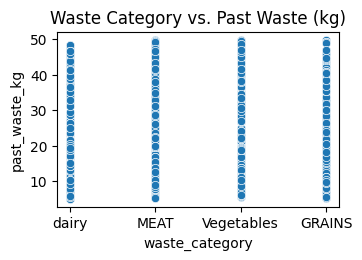

<ipython-input-62-f368740da257>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='staff_experience', y='past_waste_kg', data=data_clean,  palette='viridis')


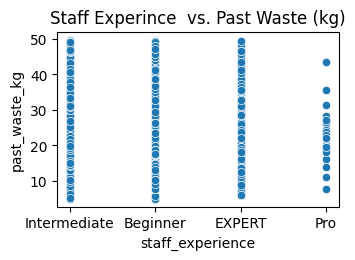

<ipython-input-62-f368740da257>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='kitchen_staff', y='past_waste_kg', data=data_clean,  palette='viridis')


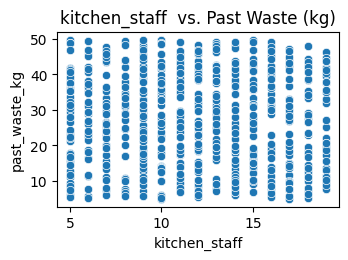

<ipython-input-62-f368740da257>:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='temperature_C', y='past_waste_kg', data=data_clean,  palette='viridis')


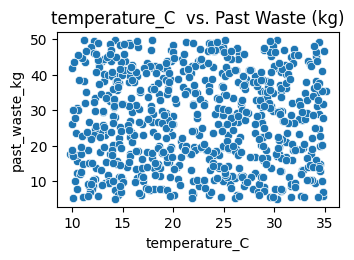

In [62]:

# 2. Relationships
plt.figure(figsize=(8, 5))
plt.subplot(2, 2, 1)
sns.scatterplot(x='waste_category', y='past_waste_kg', data=data_clean,  palette='viridis')
plt.title('Waste Category vs. Past Waste (kg)')
plt.show()


plt.figure(figsize=(8,5))
plt.subplot(2,2,2)
sns.scatterplot(x='staff_experience', y='past_waste_kg', data=data_clean,  palette='viridis')
plt.title('Staff Experince  vs. Past Waste (kg)')
plt.show()


plt.figure(figsize=(8,5))
plt.subplot(2,2,2)
sns.scatterplot(x='kitchen_staff', y='past_waste_kg', data=data_clean,  palette='viridis')
plt.title('kitchen_staff  vs. Past Waste (kg)')
plt.show()


plt.figure(figsize=(8,5))
plt.subplot(2,2,2)
sns.scatterplot(x='temperature_C', y='past_waste_kg', data=data_clean,  palette='viridis')
plt.title('temperature_C  vs. Past Waste (kg)')
plt.show()

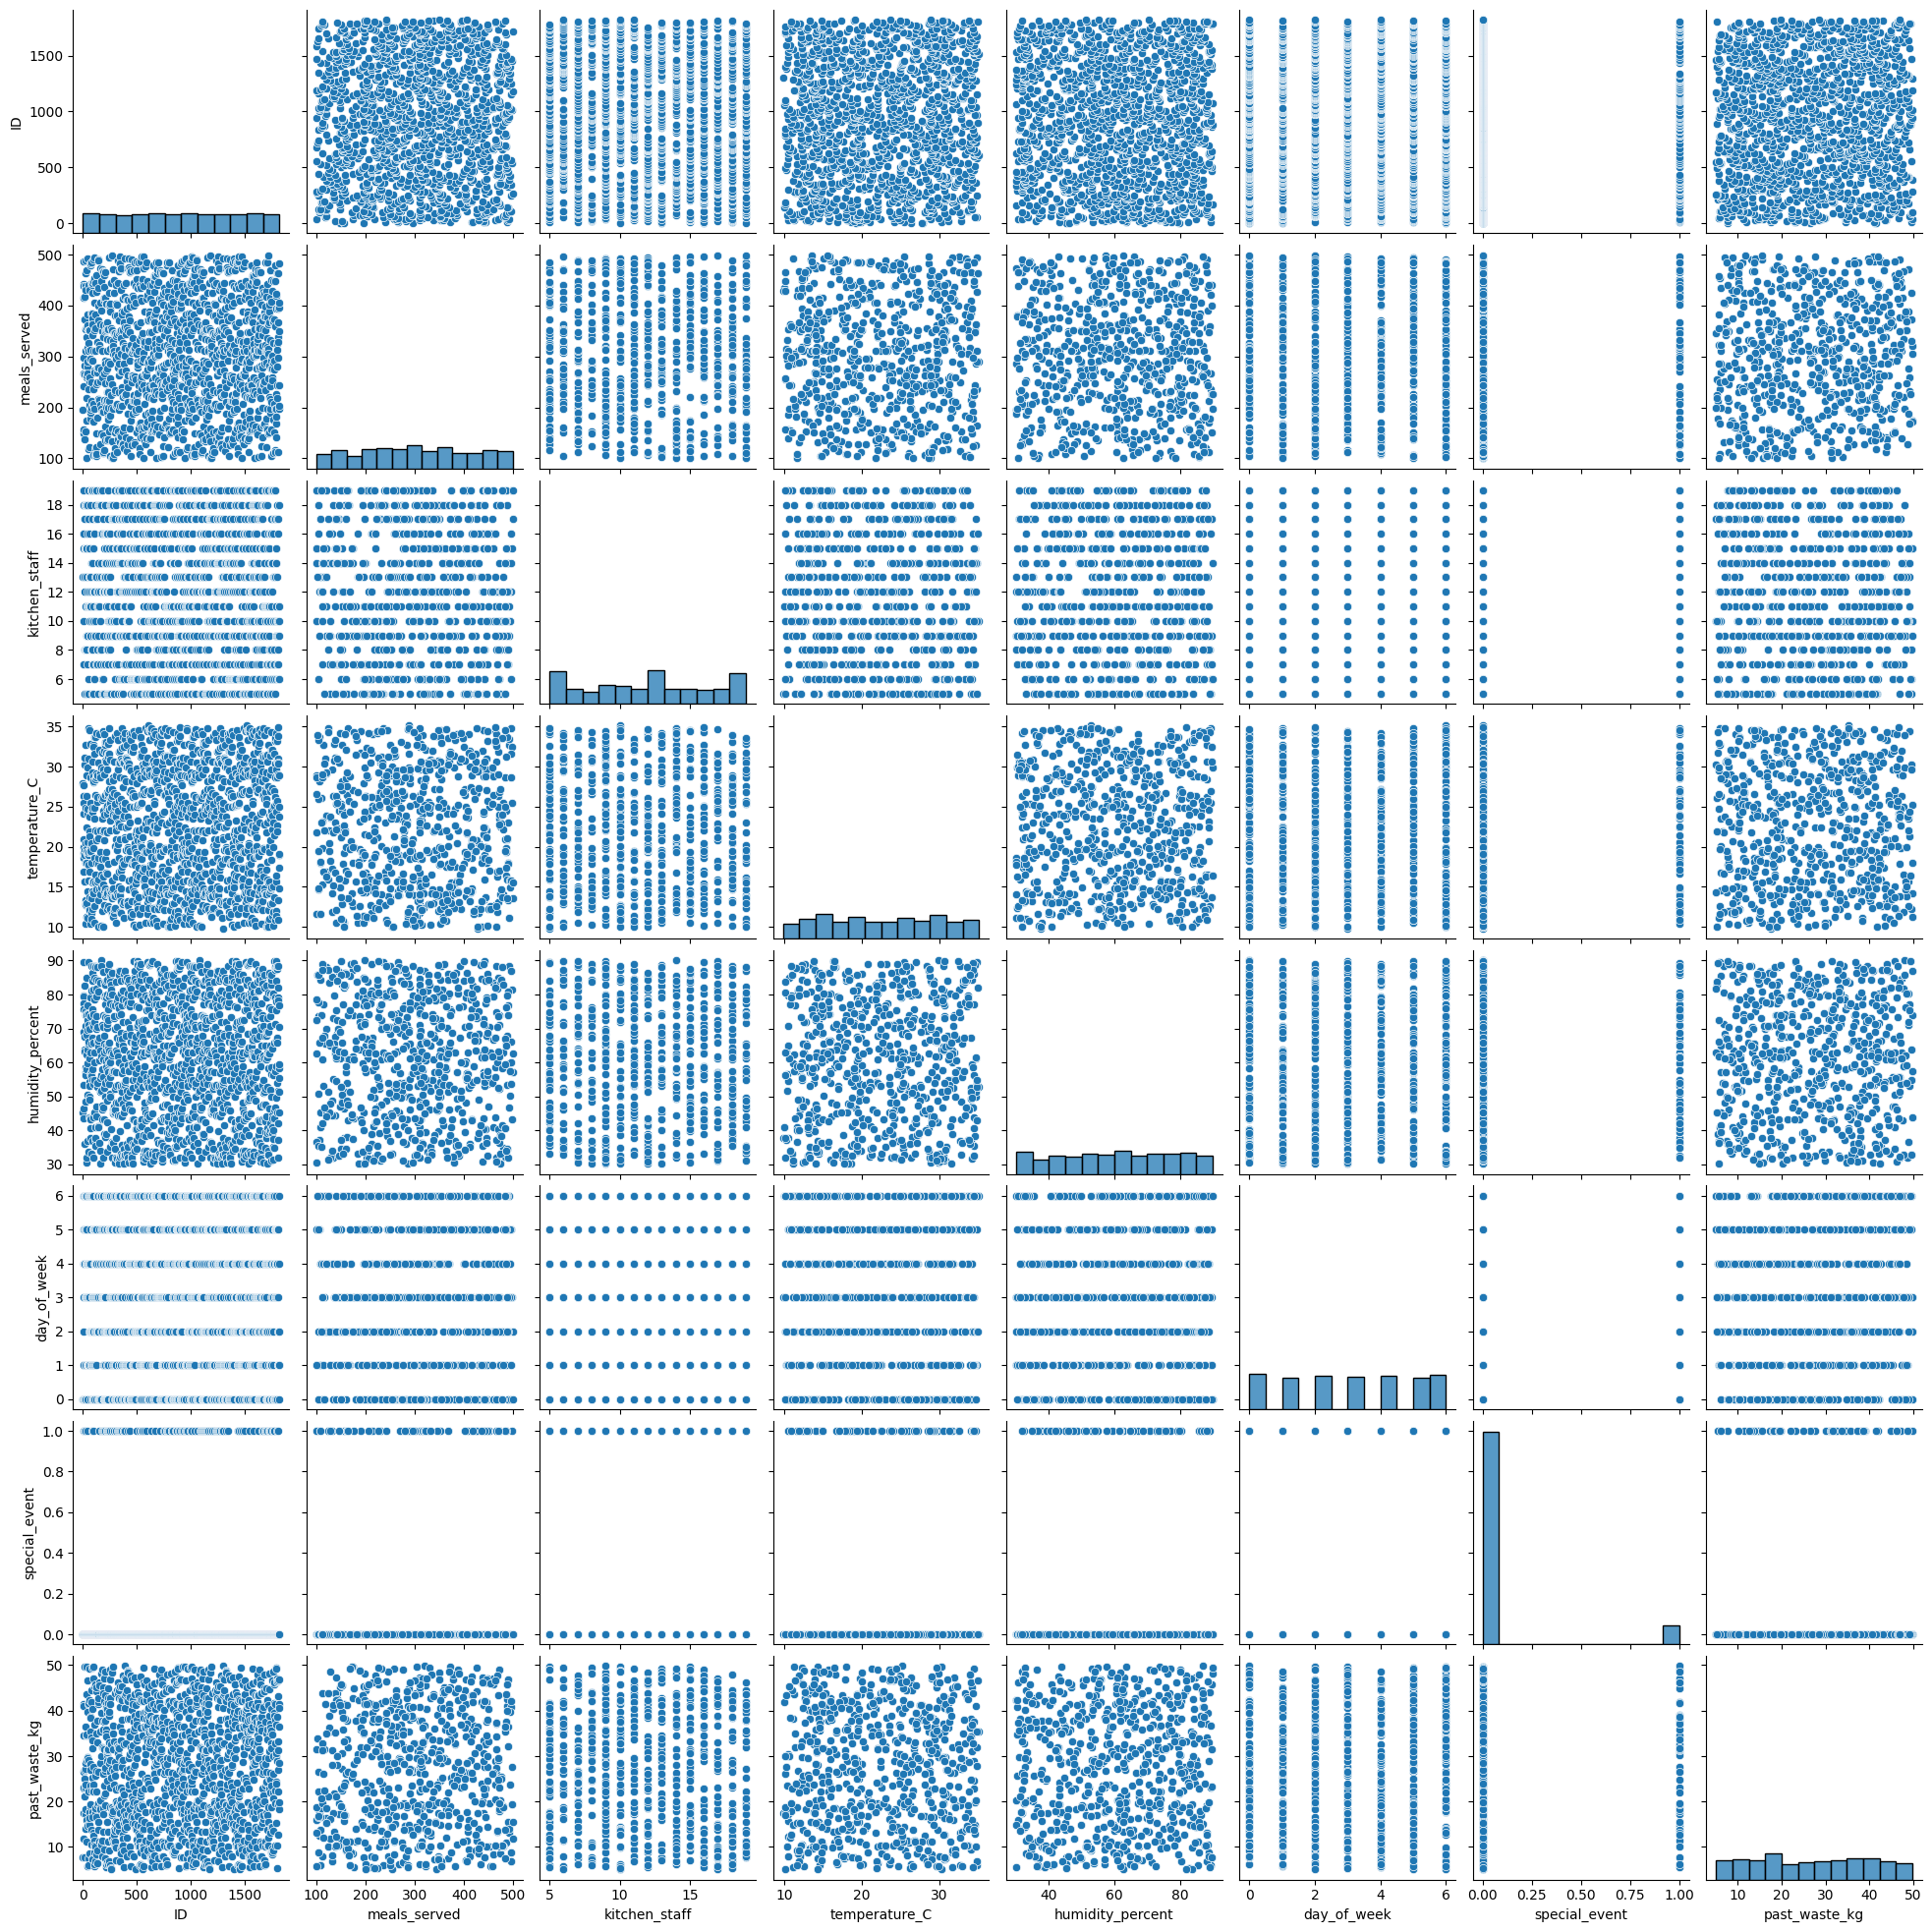

In [63]:
sns.pairplot(numerical_data_cleaned)
plt.show()

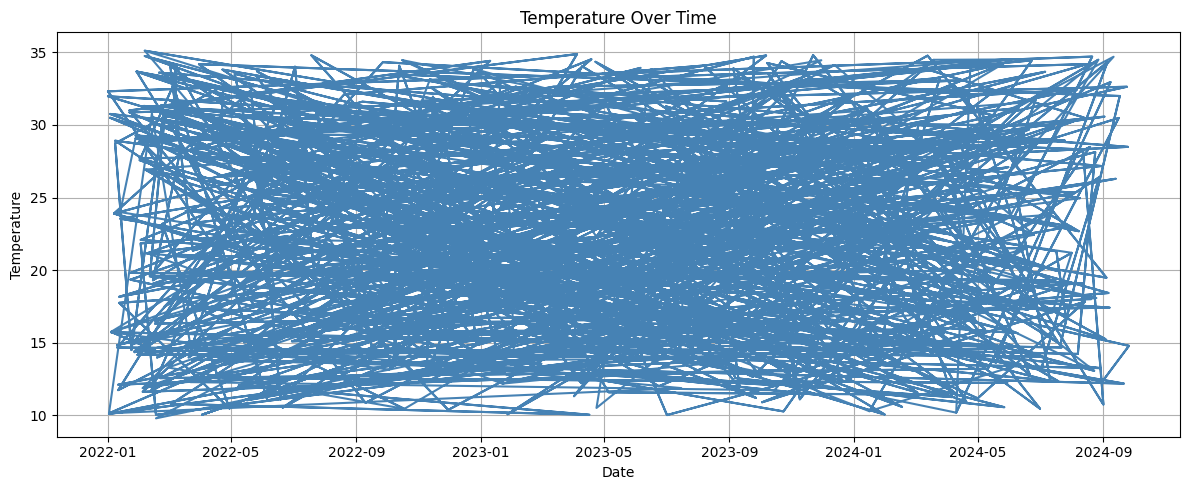

In [64]:
data_clean['date'] = pd.to_datetime(data_clean['date'])
plt.figure(figsize=(12,5))
plt.plot(data_clean['date'], data_clean['temperature_C'], label='Temperature', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-65-29b0c2f736b1>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data_clean.resample('M', on='date')['temperature_C'].mean()


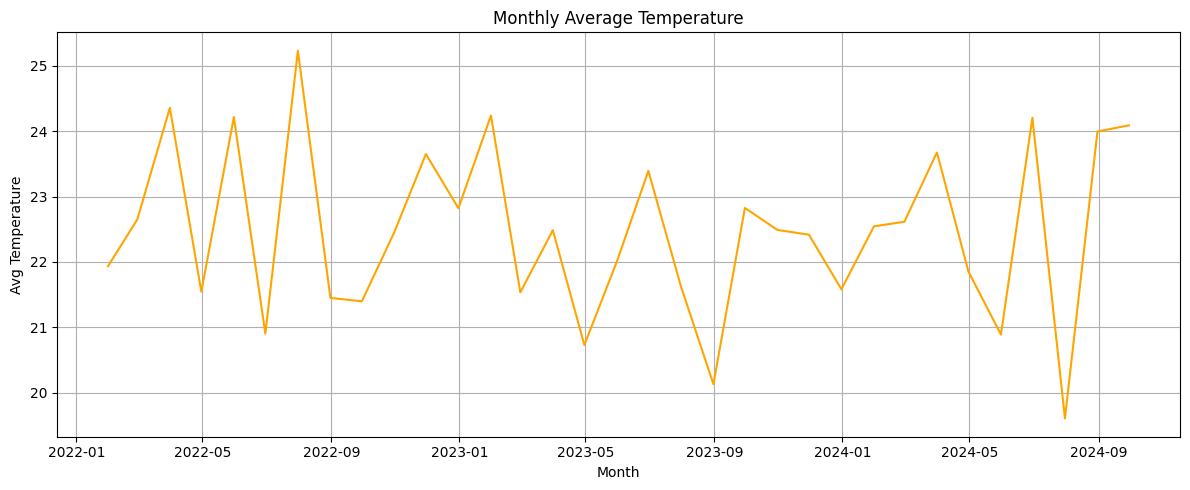

In [65]:
monthly_avg = data_clean.resample('M', on='date')['temperature_C'].mean()

plt.figure(figsize=(12,5))
plt.plot(monthly_avg.index, monthly_avg.values, label='Monthly Avg Temp', color='orange')
plt.xlabel('Month')
plt.ylabel('Avg Temperature')
plt.title('Monthly Average Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


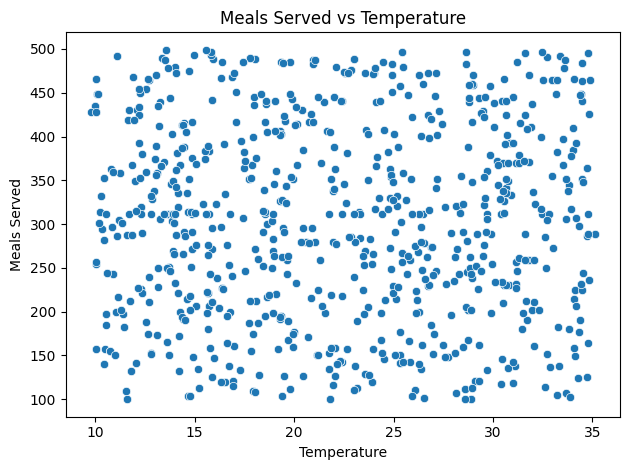

In [66]:

sns.scatterplot(data=data_clean, x='temperature_C', y='meals_served')
plt.title('Meals Served vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Meals Served')
plt.tight_layout()
plt.show()


<ipython-input-67-695711883815>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = data_clean.resample('M', on='date')['temperature_C'].mean()
<ipython-input-67-695711883815>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_waste = data_clean.resample('M', on='date')['past_waste_kg'].mean()


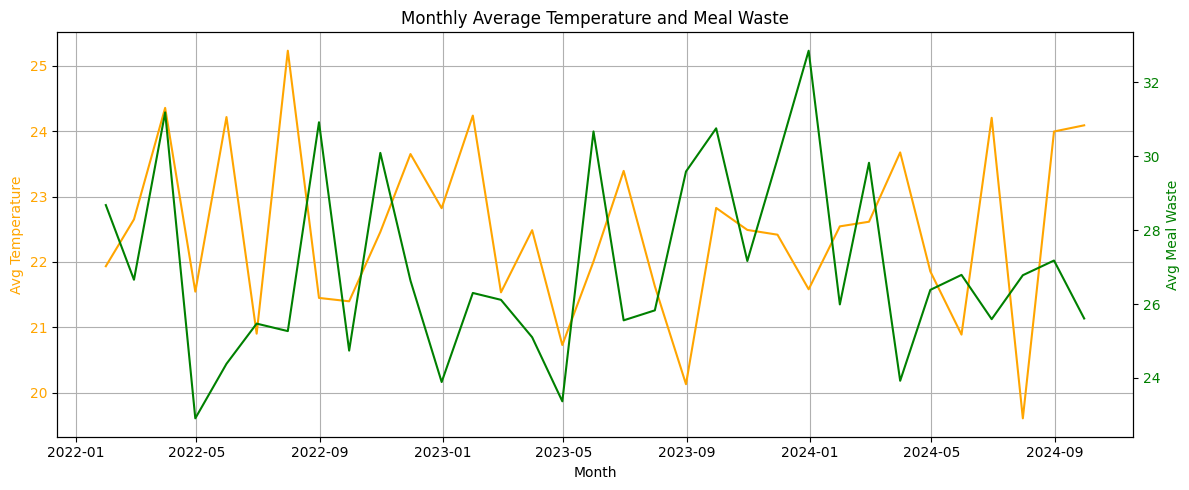

In [67]:
# relation between meal waste and temperature
monthly_avg_temp = data_clean.resample('M', on='date')['temperature_C'].mean()
monthly_avg_waste = data_clean.resample('M', on='date')['past_waste_kg'].mean()

# a figure with two subplots for better comparison
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot the Monthly Avg Temp
ax1.plot(monthly_avg_temp.index, monthly_avg_temp.values, label='Monthly Avg Temp', color='orange')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Temperature', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# second y-axis to plot Meal Waste
ax2 = ax1.twinx()
ax2.plot(monthly_avg_waste.index, monthly_avg_waste.values, label='Monthly Avg Meal Waste', color='green')
ax2.set_ylabel('Avg Meal Waste', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Monthly Average Temperature and Meal Waste')
ax1.grid(True)

plt.tight_layout()

plt.show()


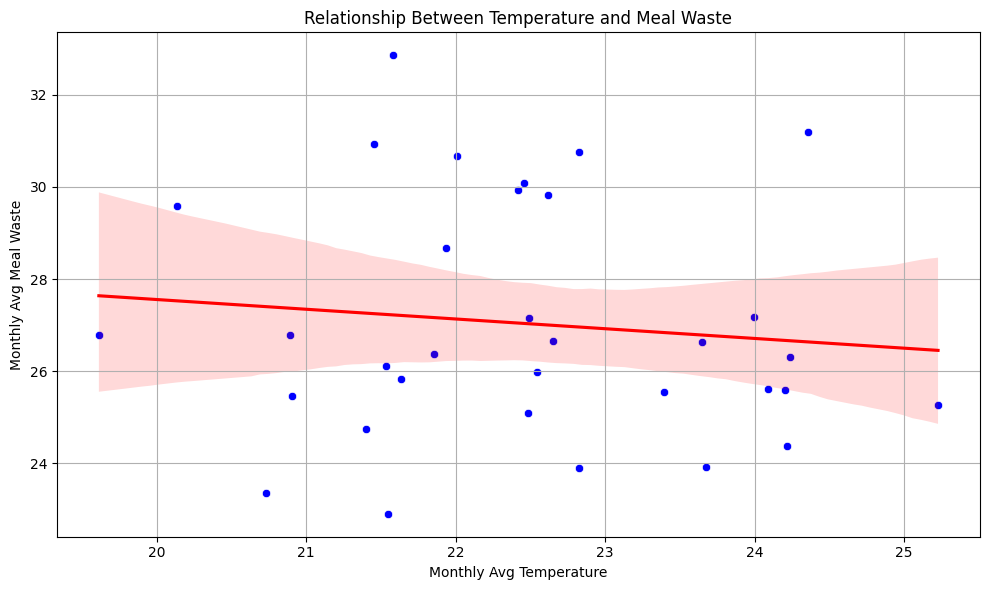

In [68]:

# Scatter plot to show relationship between monthly average temperature and meal waste
plt.figure(figsize=(10, 6))
sns.scatterplot(x=monthly_avg_temp, y=monthly_avg_waste, color='blue')

# Add a regression line to see trends
sns.regplot(x=monthly_avg_temp, y=monthly_avg_waste, scatter=False, color='red')

# Labeling
plt.xlabel('Monthly Avg Temperature')
plt.ylabel('Monthly Avg Meal Waste')
plt.title('Relationship Between Temperature and Meal Waste')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


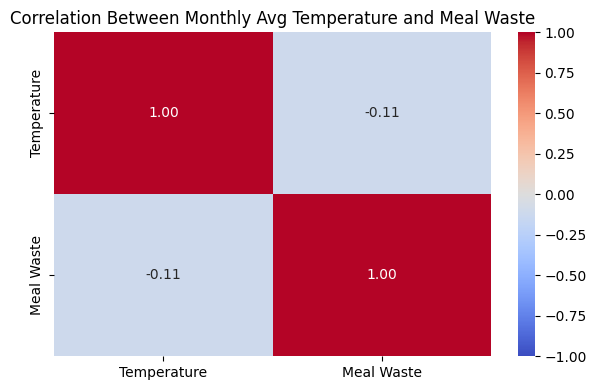

In [69]:


# Combine the monthly average temperature and meal waste into a DataFrame
monthly_data = pd.DataFrame({
    'Temperature': monthly_avg_temp,
    'Meal Waste': monthly_avg_waste
})

# Calculate the correlation matrix
corr = monthly_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)

# Title and layout
plt.title('Correlation Between Monthly Avg Temperature and Meal Waste')
plt.tight_layout()
plt.show()


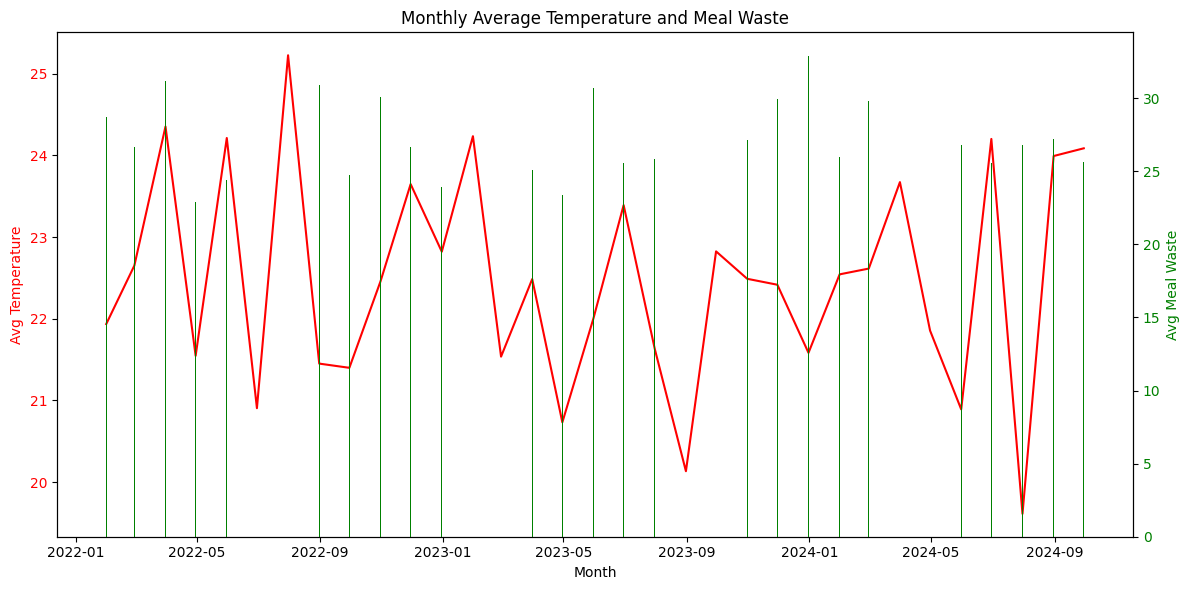

In [70]:

fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for temperature
ax1.plot(monthly_avg_temp.index, monthly_avg_temp.values, label='Monthly Avg Temp', color='red')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Temperature', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.bar(monthly_avg_waste.index, monthly_avg_waste.values, label='Monthly Avg Meal Waste', color='green', alpha=1)
ax2.set_ylabel('Avg Meal Waste', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Monthly Average Temperature and Meal Waste')
#ax1.grid(True)
plt.tight_layout()

plt.show()


# **3. Hypothesis Testing**
**3.1. Impact of Kitchen Staff on Food Waste**

We will test whether the number of kitchen staff affects the amount of food waste. One hypothesis could be:

**● Null hypothesis (H0):** There is no relationship between the number of kitchen staff and food waste.

**● Alternative hypothesis (H1):** The number of kitchen staff significantly affects food waste.

In [ ]:
# Label encoding of staff experience
experience_mapping = {'Beginner': 1, 'Intermediate': 2, 'EXPERT': 3, 'Pro': 4}
data_clean['Experience Level'] = data_clean['staff_experience'].map(experience_mapping)

# Group the data by experience levels and gather food waste data
beginner_waste = data_clean[data_clean['Experience Level'] == 1]['past_waste_kg']
intermediate_waste = data_clean[data_clean['Experience Level'] == 2]['past_waste_kg']
expert_waste = data_clean[data_clean['Experience Level'] == 3]['past_waste_kg']
pro_waste = data_clean[data_clean['Experience Level'] == 4]['past_waste_kg']

# Perform ANOVA
f_statistic, p_value = f_oneway(beginner_waste, intermediate_waste, expert_waste, pro_waste)

# Output results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in food waste between different experience levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in food waste between different experience levels.")



F-statistic: 2.290121984753078
P-value: 0.07664336044417798
Fail to reject the null hypothesis: There is no significant difference in food waste between different experience levels.


There is no statistically significant difference in mean food waste across the different kitchen staff experience levels ("Beginner," "Intermediate," "Expert," "Pro"). This means that experience level, on its own, does not appear to have a significant impact on food waste in  dataset.

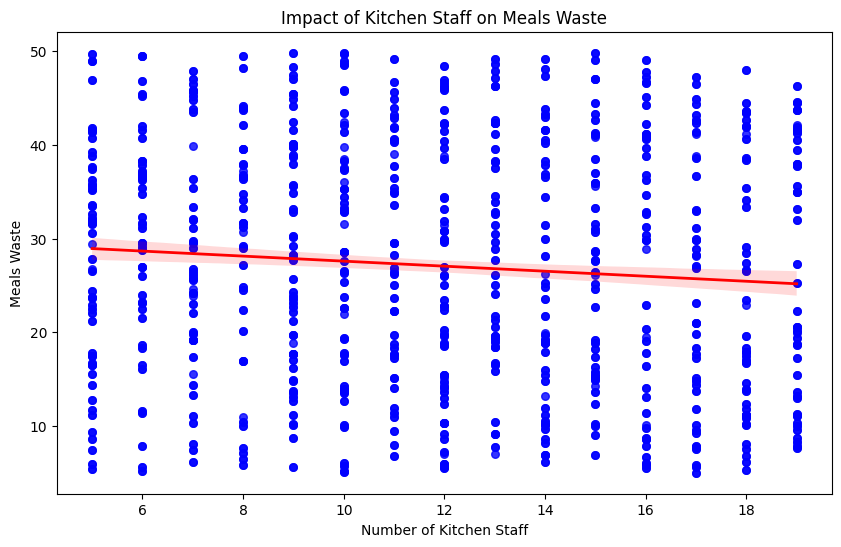

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=kitchen_staff, y=meals_waste, line_kws={"color": "red", "linewidth": 2}, scatter_kws={"color": "blue", "s": 30})

# Labels and title
plt.xlabel('Number of Kitchen Staff')
plt.ylabel('Meals Waste')
plt.title('Impact of Kitchen Staff on Meals Waste')
plt.show()

Correlation Coefficient: -0.0894

This value indicates a very weak negative correlation between the number of kitchen staff and food waste. A negative correlation suggests that, as the number of kitchen staff increases, food waste slightly decreases. However, the strength of the relationship is very weak, as the correlation is close to 0.

P-value: 0.0009

Since the p-value is much smaller than 0.05, we can reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁). This means there is a statistically significant relationship between the number of kitchen staff and food waste, even though the strength of the relationship is weak.

**3.2. Special Events and Food Waste**

We will test whether food waste increases during special events:

In [ ]:
from scipy.stats import ttest_ind

# Split the data
event_days = data_clean[data_clean['special_event'] == 1]['past_waste_kg']
non_event_days = data_clean[data_clean['special_event'] == 0]['past_waste_kg']

# Perform one-tailed t-test
t_stat, p_value = ttest_ind(event_days, non_event_days, equal_var=False)

# One-tailed p-value (testing if event days have *more* waste)
p_one_tailed = p_value / 2

print("T-statistic:", t_stat)
print("One-tailed P-value:", p_one_tailed)


T-statistic: 0.028355043096307465
One-tailed P-value: 0.48871091913295395


Null hypothesis Fails

No significant evidence that food waste increases during events

# **4. Key Insights and Recommendations**

Based on the data exploration and analysis, we will derive insights and provide
recommendations, including:

**● Staffing Optimization:**
If there is a significant relationship between staff numbers and food waste, suggest optimal staffing levels to minimize waste.

● **Environmental Factors:**
If temperature or humidity affects food waste,
recommend strategies to adjust food preparation based on weather conditions.

**● Event Management:**
If special events lead to higher food waste, suggest
strategies to better manage food during these times (e.g., pre-planning portion
sizes or reducing food waste through donation).

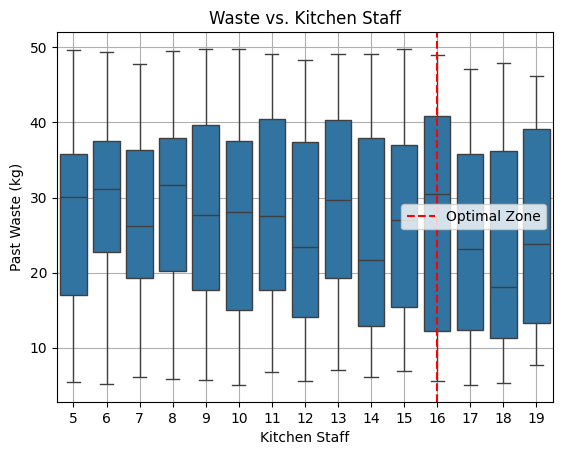

    kitchen_staff  past_waste_kg
0               5      30.009884
1               6      31.087902
2               7      26.269618
3               8      31.653562
4               9      27.666877
5              10      28.082706
6              11      27.566158
7              12      23.408832
8              13      29.638305
9              14      21.745410
10             15      27.001659
11             16      30.408794
12             17      23.100068
13             18      18.129756
14             19      23.746227


In [ ]:
#staff optimization

sns.boxplot(x='kitchen_staff', y='past_waste_kg', data=data_clean)
plt.title('Kitchen Staff vs. Past Waste (kg)')
plt.xlabel('Kitchen Staff')
plt.ylabel('Past Waste (kg)')
plt.xticks()
plt.grid(True)
plt.axvline(x=11, color='red', linestyle='--', label='Optimal Zone')
plt.legend()

plt.title("Waste vs. Kitchen Staff")
plt.show()

summary = data_clean.groupby('kitchen_staff')['past_waste_kg'].median().reset_index()
print(summary)



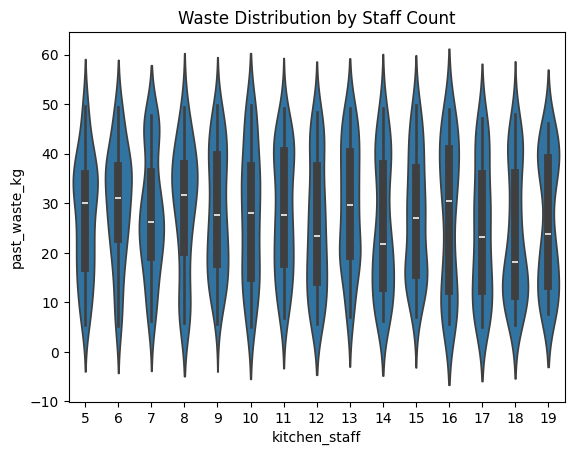

In [ ]:
sns.violinplot(x='kitchen_staff', y='past_waste_kg', data=data_clean)
plt.title("Waste Distribution by Staff Count")
plt.show()


The boxplot reveals that the kitchen staff size of 16–17 tends to produce lower and more consistent food waste, compared to other staffing levels. This insight suggests that scheduling staff in this range may help reduce food waste and improve operational efficiency

In [ ]:
#Environmental Factors
corr_matrix = data_clean[['temperature_C', 'humidity_percent', 'past_waste_kg']].corr()
print(corr_matrix)


                  temperature_C  humidity_percent  past_waste_kg
temperature_C          1.000000         -0.000136      -0.003509
humidity_percent      -0.000136          1.000000       0.024047
past_waste_kg         -0.003509          0.024047       1.000000


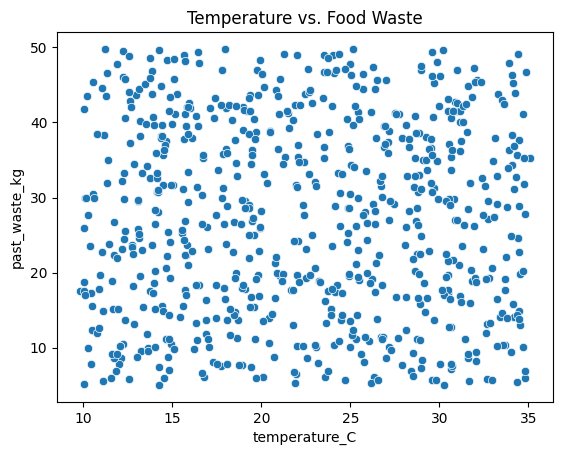

In [ ]:
sns.scatterplot(x='temperature_C', y='past_waste_kg', data=data_clean)
plt.title("Temperature vs. Food Waste")
plt.show()


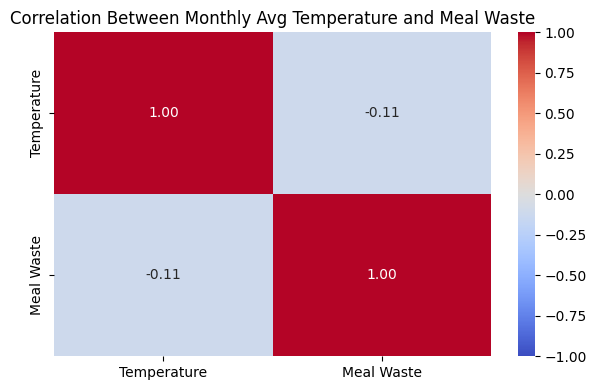

In [ ]:
# Combine the monthly average temperature and meal waste into a DataFrame
monthly_data = pd.DataFrame({
    'Temperature': monthly_avg_temp,
    'Meal Waste': monthly_avg_waste
})

# Calculating correlation matrix
corr = monthly_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)

# Title and layout
plt.title('Correlation Between Monthly Avg Temperature and Meal Waste')
plt.tight_layout()
plt.show()


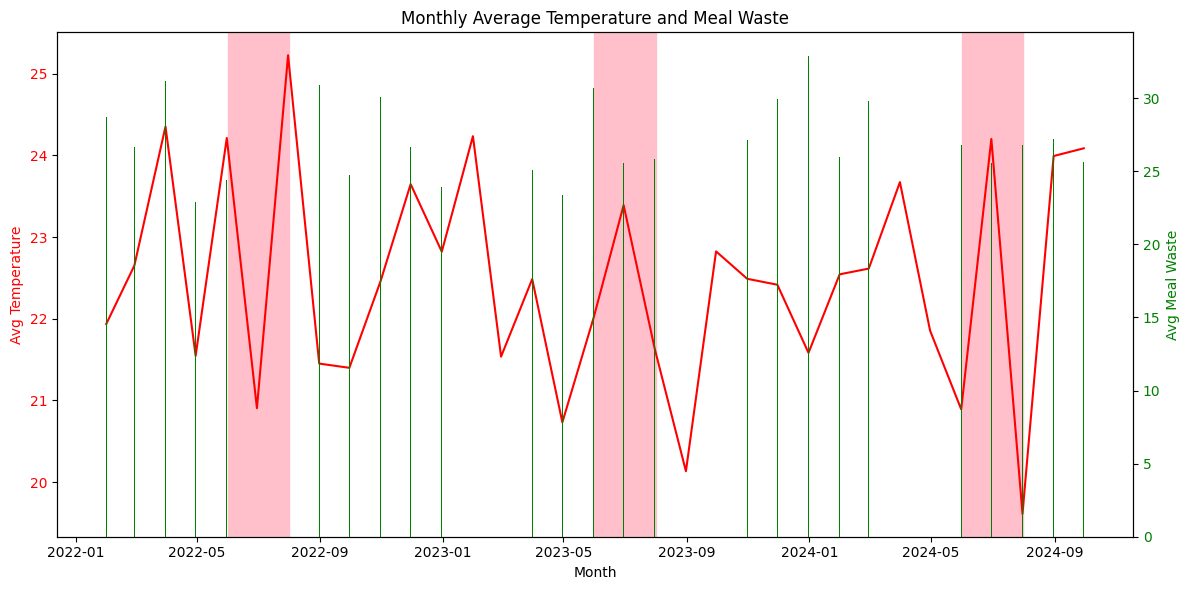

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for temperature
ax1.plot(monthly_avg_temp.index, monthly_avg_temp.values, label='Monthly Avg Temp', color='red')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Temperature', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.bar(monthly_avg_waste.index, monthly_avg_waste.values, label='Monthly Avg Meal Waste', color='green', alpha=1)
ax2.set_ylabel('Avg Meal Waste', color='green')
ax2.tick_params(axis='y', labelcolor='green')
for year in [2022, 2023, 2024]:
    ax1.axvspan(f'{year}-06', f'{year}-08', color='pink', alpha=1)

plt.title('Monthly Average Temperature and Meal Waste')
#ax1.grid(True)
plt.tight_layout()

plt.show()


Visual analysis shows that higher temperatures during summer months tend to coincide with increased food waste. This seasonal pattern suggests that despite weak statistical correlation, warmer weather may indirectly lead to more waste, potentially due to faster spoilage or storage stress during hotter periods.

Actionable strategies could include reducing food prep volume, improving cold storage, and increasing shelf-life monitoring during summer months.



In [ ]:
#Event_managment
event_waste_summary = data_clean.groupby('special_event')['past_waste_kg'].describe()
print(event_waste_summary)


                count       mean        std       min        25%        50%  \
special_event                                                                 
0              1259.0  27.067368  12.896017  5.041824  16.010433  27.068383   
1               112.0  27.103147  12.787970  5.474801  16.852716  26.657786   

                     75%        max  
special_event                        
0              38.348631  49.733674  
1              37.538224  49.796337  


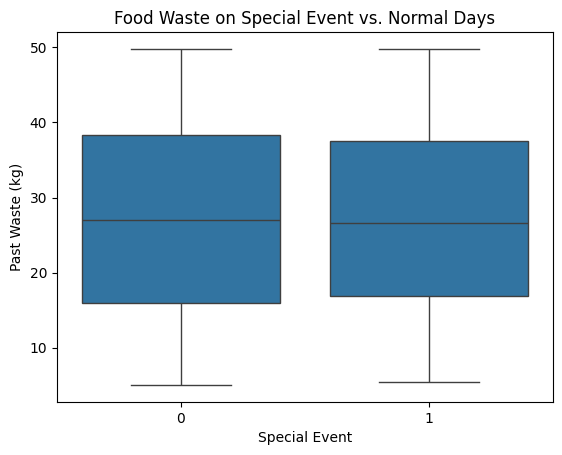

In [ ]:


sns.boxplot(x='special_event', y='past_waste_kg', data=data_clean)
plt.title('Food Waste on Special Event vs. Normal Days')
plt.xlabel('Special Event')
plt.ylabel('Past Waste (kg)')
plt.show()


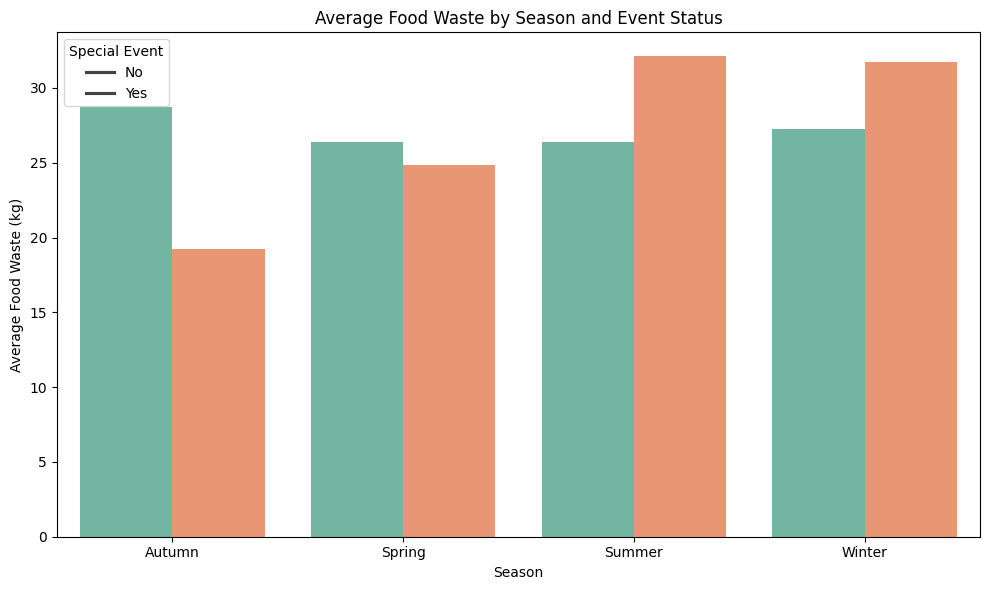

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data_clean['date'] = pd.to_datetime(data_clean['date'])  # Ensure datetime
data_clean['season'] = data_clean['date'].dt.month.apply(get_season)
season_event_waste = data_clean.groupby(['season', 'special_event'])['past_waste_kg'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=season_event_waste, x='season', y='past_waste_kg', hue='special_event', palette='Set2')

plt.title('Average Food Waste by Season and Event Status')
plt.xlabel('Season')
plt.ylabel('Average Food Waste (kg)')
plt.legend(title='Special Event', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


Special events increase food waste in most seasons, especially Summer and Winter, likely due to higher turnout or spoilage in warmer months.

Autumn is an exception, where waste is lower on event days — potentially indicating better event management or lower participation during this season.

**Recommendation:**

Focus on improving waste-reduction strategies during Summer and Winter events, including:

  Accurate guest forecasting

  Real-time portion adjustments

  Food storage enhancements in hot months

  Post-event donation plans

# 5. Data Visualization and Reporting




## **● Histograms and Box Plots**
to visualize the distributions of meals_served, temperature_C, humidity_percent, and past_waste_kg.

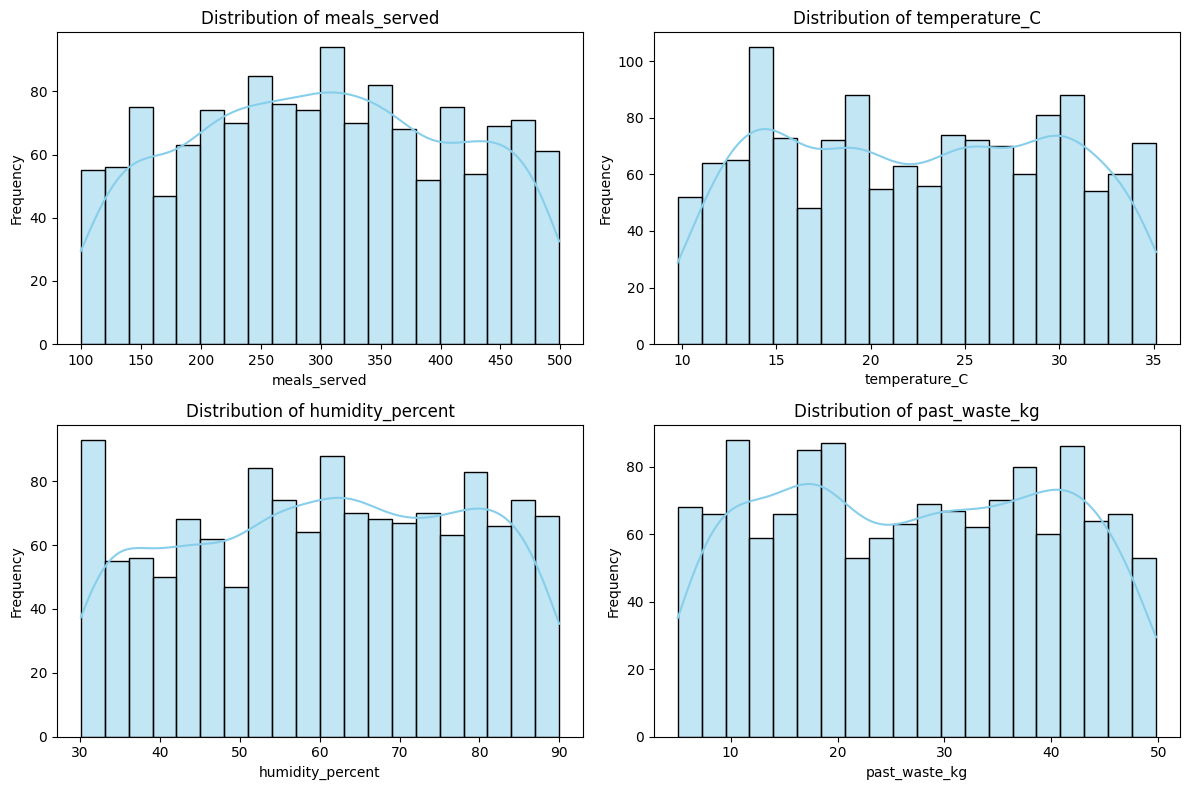

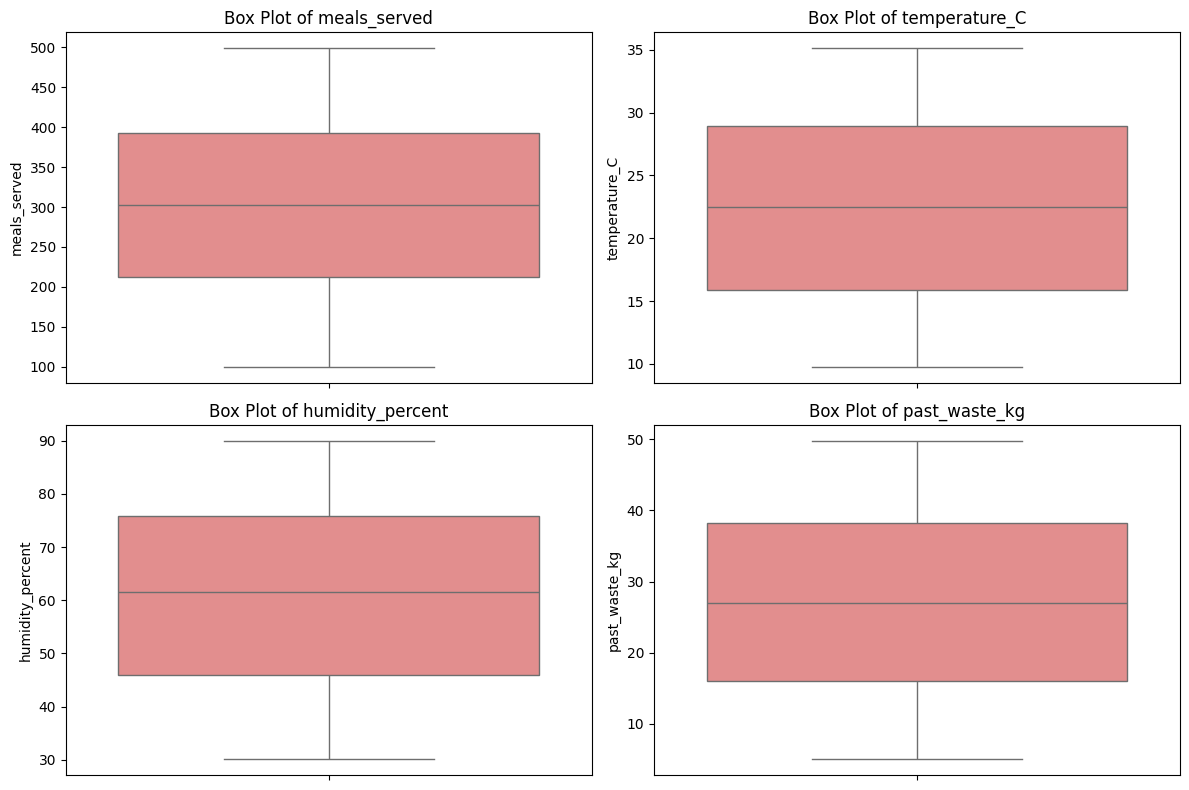

In [71]:
#Histogram
variables = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg']

plt.figure(figsize=(12, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_clean[var], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
#BOxPlot
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data_clean, y=var, color='lightcoral')
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()



##**● Correlation Heatmap** to show relationships between numeric variables.


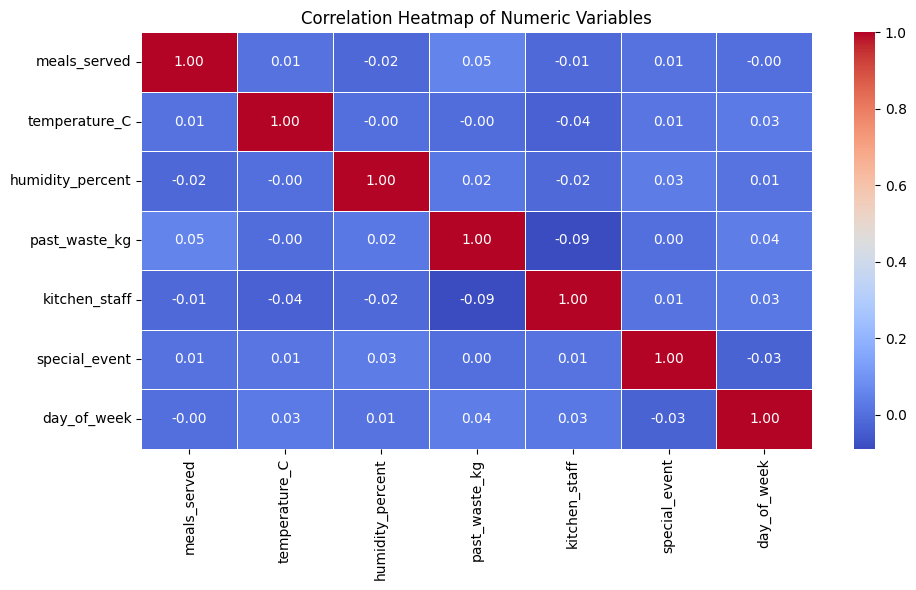

In [72]:
#Correlation Heatmap to show relationships between numeric variables
numerical_columns =['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg', 'kitchen_staff','special_event','day_of_week']

# Compute the correlation matrix
corr_matrix = data_clean[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()


##**● Bar Plots **comparing food waste across waste_category and staff_experience.

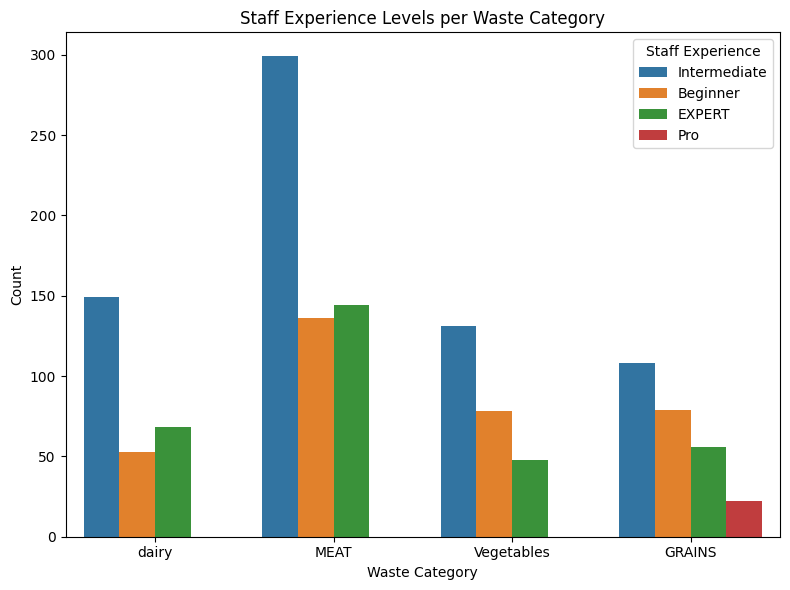

In [73]:
# Bar Plots comparing food waste across waste_category and staff_experience.
#Bar Plots
plt.figure(figsize=(8, 6))
sns.countplot(data=data_clean, x='waste_category', hue='staff_experience')

plt.xlabel('Waste Category')
plt.ylabel('Count')
plt.title('Staff Experience Levels per Waste Category')
plt.legend(title='Staff Experience')
plt.tight_layout()
plt.show()

To save Data

In [74]:

data_clean.to_csv('food_data_cleaned.csv', index=False)
